In [1]:
height = 4
width = 12
Q = [[0 for x in range(width)] for y in range(height)]

In [9]:
start = [height-1,0]
goal = [height-1,width-1]
cliff = [[height-1,i] for i in range(1,width-1)]
actions = ["↑","←","↓","→"] # up left down right

In [77]:
import numpy as np

height = 4
width = 12
Q = np.zeros((height, width, 4))  # 状態ごとに4つの行動を保持
start = [height - 1, 0]
goal = [height - 1, width - 1]
cliff = [[height - 1, i] for i in range(1, width - 1)]
actions = ["↑", "←", "↓", "→"]  # up left down right

class WindyQ:
    def __init__(self, Q):
        self.state = start  
        self.Q = Q
        self.alpha = 0.5
        self.reward = -1
        self.gamma = 1
        self.epsilon = 0.1
        self.sum_rewards = []   

    def move(self, state, action):
        x, y = state
        if action == 0 and x > 0:  # 上
            x -= 1
        elif action == 1 and y > 0:  # 左
            y -= 1
        elif action == 2 and x < height - 1:  # 下
            x += 1
        elif action == 3 and y < width - 1:  # 右
            y += 1
        next_state = [x, y]
        return next_state

    def is_cliff(self, state):
        return state in cliff

    def is_goal(self, state):
        return state == goal

    def update(self, Q, state, action, next_state):
        x, y = state
        x_, y_ = next_state
        Q[x, y, action] += self.alpha * (
            self.reward + self.gamma * np.max(Q[x_, y_, :]) - Q[x, y, action]
        )
        self.sum_rewards += self.reward
        return Q

    def step(self):
        self.reward = -1  # 毎ステップの基本報酬をリセット
        if np.random.rand() < self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])
        next_state = self.move(self.state, action)
        if self.is_cliff(next_state):
            self.reward = -100
            next_state = start
        elif self.is_goal(next_state):
            self.reward = 0
        self.Q = self.update(self.Q, self.state, action, next_state)
        self.state = next_state
        return self.state

# メインループ
windyQ = WindyQ(Q)
q_history = []
q_rewards = []
for i in range(1000):
    windyQ.state = start  # 
    count = 0
    while not windyQ.is_goal(windyQ.state):
        count += 1 
        windyQ.step()
    q_history.append(count)
    q_rewards.append(windyQ.reward)
    if i % 100 == 0:
        print(f"Episode {i}:\n\n {np.argmax(windyQ.Q, axis=2)}\n")


TypeError: 'int' object is not iterable

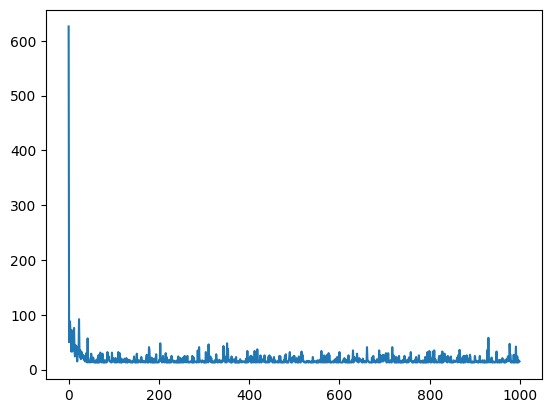

In [64]:
import matplotlib.pyplot as plt
plt.plot(q_history)

In [65]:
q_policy = np.argmax(windyQ.Q, axis=2)
for i in range(height):
    for j in range(width):
        if [i, j] == start:
            print("S", end=" ")
        elif [i, j] == goal:
            print("G", end=" ")
        elif [i, j] in cliff:
            print("C", end=" ")
        else:
            print(actions[q_policy[i, j]], end=" ")
    print()

→ ↓ → → ← → → → → → ↓ ↓ 
→ ↓ → → → → ↓ → → ↓ → ↓ 
→ → → → → → → → → → → ↓ 
S C C C C C C C C C C G 


In [79]:
import numpy as np

height = 4
width = 12
Q = np.zeros((height, width, 4))  # 状態ごとに4つの行動を保持
start = [height - 1, 0]
goal = [height - 1, width - 1]
cliff = [[height - 1, i] for i in range(1, width - 1)]
actions = ["↑", "←", "↓", "→"]  # up left down right

class WindySarsa:
    
    def __init__(self, Q, start, goal, cliff):
        self.state = start  
        self.start = start
        self.goal = goal
        self.cliff = cliff
        self.Q = Q
        self.alpha = 0.5
        self.reward = -1
        self.gamma = 1
        self.epsilon = 0.1
        self.sum_rewards = 0  # 合計報酬を数値で管理

    def move(self, state, action):
        x, y = state
        if action == 0 and x > 0:  # 上
            x -= 1
        elif action == 1 and y > 0:  # 左
            y -= 1
        elif action == 2 and x < height - 1:  # 下
            x += 1
        elif action == 3 and y < width - 1:  # 右
            y += 1
        next_state = [x, y]
        return next_state

    def is_cliff(self, state):
        return state in self.cliff

    def is_goal(self, state):
        return state == self.goal

    def update(self, Q, state, action, next_state, next_action):
        x, y = state
        x_, y_ = next_state
        Q[x, y, action] += self.alpha * (
            self.reward + self.gamma * Q[x_, y_, next_action] - Q[x, y, action]
        )
        self.sum_rewards += self.reward  # 報酬を加算
        return Q

    def step(self):
        self.reward = -1  # 毎ステップの基本報酬をリセット
        if np.random.rand() < self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])

        next_state = self.move(self.state, action)

        if self.is_cliff(next_state):
            self.reward = -100
            next_state = self.start
        elif self.is_goal(next_state):
            self.reward = 0

        if np.random.rand() < self.epsilon:
            next_action = np.random.randint(4)
        else:
            next_action = np.argmax(self.Q[next_state[0], next_state[1], :])

        self.Q = self.update(self.Q, self.state, action, next_state, next_action)
        self.state = next_state
        return self.state

# メインループ
windySarsa = WindySarsa(Q, start, goal, cliff)
sarsa_history = []
sarsa_rewards = []  # 修正済み

for i in range(1000):
    windySarsa.state = windySarsa.start  # 各エピソードの初期化
    windySarsa.sum_rewards = 0  # 報酬の合計をリセット
    count = 0
    while not windySarsa.is_goal(windySarsa.state):
        count += 1 
        windySarsa.step()
    sarsa_history.append(count)
    sarsa_rewards.append(windySarsa.sum_rewards)  # エピソード全体の報酬を記録
    if i % 100 == 0:
        print(f"Episode {i}: Steps taken = {count}, Total rewards = {windySarsa.sum_rewards}")
        print(f"Policy (argmax Q-values):\n{np.argmax(windySarsa.Q, axis=2)}\n")


Episode 0: Steps taken = 608, Total rewards = -1993
Policy (argmax Q-values):
[[3 1 2 3 0 3 3 2 1 3 0 3]
 [0 1 0 2 2 2 1 1 3 3 1 3]
 [0 0 1 3 0 1 0 3 0 3 3 2]
 [2 0 0 0 0 0 0 0 0 0 0 0]]

Episode 100: Steps taken = 19, Total rewards = -18
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 3 2]
 [3 3 1 0 3 3 1 2 3 0 3 2]
 [0 0 1 0 0 0 3 0 3 1 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 200: Steps taken = 17, Total rewards = -16
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 2 2]
 [3 3 3 3 0 2 0 0 0 0 3 2]
 [0 0 0 0 0 0 3 0 0 1 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 300: Steps taken = 18, Total rewards = -17
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 3 2]
 [3 0 0 3 3 3 0 0 0 0 3 2]
 [0 0 0 3 0 0 0 0 0 1 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 400: Steps taken = 18, Total rewards = -17
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 2 2]
 [0 3 3 3 0 3 3 0 0 0 3 2]
 [0 0 0 3 0 1 3 0 3 1 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 500: Steps taken = 23, Total rewards = -121
Policy (argm

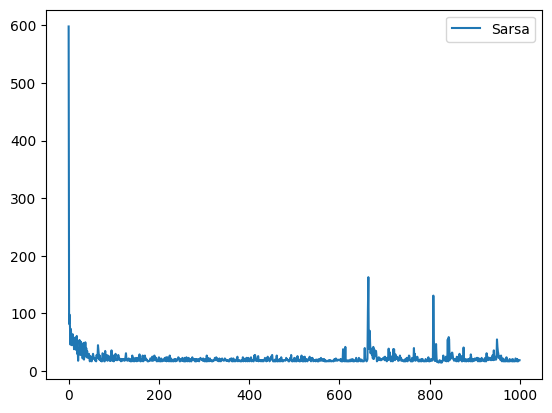

In [67]:
plt.plot(sarsa_history, label="Sarsa")
plt.legend()
plt.show()

In [68]:
sarsa_policy = np.argmax(windySarsa.Q,axis =2)
for i in range(height):
    for j in range(width):
        if [i, j] == start:
            print("S", end=" ")
        elif [i, j] == goal:
            print("G", end=" ")
        elif [i, j] in cliff:
            print("C", end=" ")
        else:
            print(actions[sarsa_policy[i, j]], end=" ")
    print()

→ → → → → → → → ↓ → → ↓ 
↑ ↑ ↑ ↑ → ↑ → → → → → → 
↑ ↑ ↑ ↑ ← ↑ ↑ ↑ ↑ ↑ → ↓ 
S C C C C C C C C C C G 


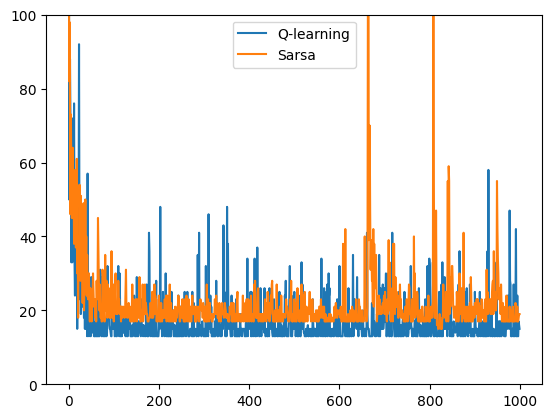

In [69]:
plt.plot(q_history, label="Q-learning")
plt.plot(sarsa_history, label="Sarsa")
plt.ylim(0, 100)
plt.legend()
plt.show()